<a href="https://colab.research.google.com/github/Jenn-mawia/State-of-Financial-Inclusion-in-East-Africa/blob/master/Moringa_Data_Science_Core_W2_Independent_Project_2020_08_Jenipher_Mawia_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the question

## Specifiying the data analytic question

Research questions: 

Find out how we can predict which individuals are most likely to have or use a bank account. 

## Defining the metric for success

The objectives of this project will be met if the following can be determined:
- Insight into the state of financial inclusion in the countries: Kenya, Uganda, Rwanda, Tanzania
- Insight into some of the key demographic factos that might drive an individual's financial outcomes
- Prediction of individuals most likely to have or use a bank account

## Understanding the context

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

## Recording the experimental design taken 

1. Loading dataset
2. Checking the dataset's shape, top, bottom, datatypes
3. External data source validation
4. Data Cleaning 
    - renaming column names & ensuring consistency in column names
    - dropping unnecessary columns
    - handling null values, duplicated records, outliers, anomalies
5. Exploratory Data Analysis
    - Univariate EDA 
    - Bivariate EDA
        - analysis by country
        - analysis by demographic factors
    - Multivariate EDA




## The appropriateness of the available data to answer the given question

The available data is deemed as appropriate as the data contains all variables that will be required to perform analysis by country and by either demographic factors such as: age, gender, level of education, income level, area or residence, employment, marital status among other factors that influence an individuals financial outcomes.

# Reading the data

In [26]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()

The data used for the project contains demographic information and financial services used by individuals across East Africa. This data was extracted from various Finscope Surveys ranging from 2016-2018. More information about this surveys can be found here: 

- FinAccess Kenya 2018. [Link](https://fsdkenya.org/publication/finaccess2019/)
- Finscope Rwanda 2016. [Link](http://www.statistics.gov.rw/publication/finscope-rwanda-2016)
- Finscope Tanzania 2017. [Link](http://www.fsdt.or.tz/finscope/)
- Finscope Uganda 2018. [Link](http://fsduganda.or.ug/finscope-2018-survey-report/)

To upload the dataset onto the environment, download the dataset [here](http://bit.ly/FinancialDataset) go to, Table of contents > files > upload on Colab. 

In [27]:
# Attribute Information: 

# country - country interviewee is in
# year - year survey was done
# uniqueid - unique identifier for each interviewee
# has_a_bank_account - if interviewee has a bank account : Yes/No
# location_type - type of location : Rural, Urban
# cellphone_access - if interviewee has access to cellphone: Yes/No
# household_size - number of people living in one house
# age_of_respondent - age of interviewee
# gender_of_respondent - gender of interviewee: Male, Female
# relationship_with_head - interviewee relationship with the head of the house: Head of Household, Spouse, Child, Parent, Other relative, Other non-relative, Don't know
# marital_status - marital status of interviewee: Married/Living together, Divorced/Separated, Widowed, Single/Never Married, Don't know
# education_level - highest level of education: No formal education, Primary education, Secondary education, Vocational/Specialised training, Tertiary education, Other/Don't know/RTA
# job_type - type of job interviewee has: Farming and Fishing, Formally employed Government, Formally employed Private, Informally employed, Remittance Dependent, Government Dependent, Self employed, Other Income, No Income, Don't know/Refused to answer

# reading the data

financial = pd.read_csv("train.csv") 


# Checking the data

In [28]:
# number of rows and columns

financial.shape

(23524, 39)

In [29]:
# preview the top of the dataset
financial.head()

,Unnamed: 0,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,year_,relationship_with_head_Child,relationship_with_head_Head of Household,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
0,0,1,0,1,3,24,0,2018,0,0,...,0,0,0,0,0,1,1,0,0,0
1,1,0,0,0,5,70,0,2018,0,1,...,1,0,0,0,0,0,1,0,0,0
2,2,1,1,1,5,26,1,2018,0,0,...,0,0,0,0,0,1,1,0,0,0
3,3,0,0,1,5,34,0,2018,0,1,...,0,0,0,0,0,0,1,0,0,0
4,4,0,1,0,8,26,1,2018,1,0,...,0,1,0,0,0,0,1,0,0,0


In [30]:
# previewing the bottom of the dataset
financial.tail()

,Unnamed: 0,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,year_,relationship_with_head_Child,relationship_with_head_Head of Household,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
23519,23519,0,0,1,4,48,0,2018,0,1,...,0,0,0,1,0,0,0,0,0,1
23520,23520,0,0,1,2,27,0,2018,0,1,...,0,0,0,1,0,0,0,0,0,1
23521,23521,0,0,1,5,27,0,2018,0,0,...,0,0,0,1,0,0,0,0,0,1
23522,23522,0,1,1,7,30,0,2018,0,0,...,0,0,0,0,0,1,0,0,0,1
23523,23523,0,0,1,10,20,1,2018,1,0,...,0,0,1,0,0,0,0,0,0,1


In [31]:
# checking whether each column has appropriate datatypes
financial.dtypes

Unnamed: 0                                         int64
bank_account                                       int64
location_type                                      int64
cellphone_access                                   int64
household_size                                     int64
age_of_respondent                                  int64
gender_of_respondent                               int64
year_                                              int64
relationship_with_head_Child                       int64
relationship_with_head_Head of Household           int64
relationship_with_head_Other non-relatives         int64
relationship_with_head_Other relative              int64
relationship_with_head_Parent                      int64
relationship_with_head_Spouse                      int64
marital_status_Divorced/Seperated                  int64
marital_status_Dont know                           int64
marital_status_Married/Living together             int64
marital_status_Single/Never Mar

# External Data Source Validation

The data available for analysis can be validated with the following [data](https://www.kaggle.com/bhrt97/machine-learning-starter-program-hackathon-dataset) from [Kaggle](https://www.kaggle.com/). 

This data was compiled to analyse and predict the performances of a trainee based on the demographic information available. This would enable a client to strengthen its training problem by focusing on the most important factors that leading to better engagement and performance of a trainee. 

Some of the demographic factors that were compiled for analysis include: gender of trainee, education level of trainee, city/area of residence, age of the trainee.

All these are very similar to what we have in our data so we can move on with analysis since we have the right data to answer our question.

# Data Cleaning

In [32]:
# # rename column
# financial.rename(columns={'The relathip with head': 'relationship_with_head', 'Level of Educuation':'level_of_education'}, inplace = True)
# financial.columns

# # making all column names consistent in the format
# financial.columns = financial.columns.str.strip().str.lower().str.replace(" ", "_")
# financial

In [33]:
# drop irrelevant fields
financial.drop(['year_'], axis=1, inplace=True)
financial

,Unnamed: 0,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
0,0,1,0,1,3,24,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,1,0,0,0,5,70,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,2,1,1,1,5,26,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,3,0,0,1,5,34,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,4,0,1,0,8,26,1,1,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,23519,0,0,1,4,48,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
23520,23520,0,0,1,2,27,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
23521,23521,0,0,1,5,27,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
23522,23522,0,1,1,7,30,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [34]:
# checking for null values
financial.isnull().sum()


Unnamed: 0                                         0
bank_account                                       0
location_type                                      0
cellphone_access                                   0
household_size                                     0
age_of_respondent                                  0
gender_of_respondent                               0
relationship_with_head_Child                       0
relationship_with_head_Head of Household           0
relationship_with_head_Other non-relatives         0
relationship_with_head_Other relative              0
relationship_with_head_Parent                      0
relationship_with_head_Spouse                      0
marital_status_Divorced/Seperated                  0
marital_status_Dont know                           0
marital_status_Married/Living together             0
marital_status_Single/Never Married                0
marital_status_Widowed                             0
education_level_No formal education           

In [35]:
# drop null values 
fin = financial.dropna()
fin.isnull().sum()

Unnamed: 0                                         0
bank_account                                       0
location_type                                      0
cellphone_access                                   0
household_size                                     0
age_of_respondent                                  0
gender_of_respondent                               0
relationship_with_head_Child                       0
relationship_with_head_Head of Household           0
relationship_with_head_Other non-relatives         0
relationship_with_head_Other relative              0
relationship_with_head_Parent                      0
relationship_with_head_Spouse                      0
marital_status_Divorced/Seperated                  0
marital_status_Dont know                           0
marital_status_Married/Living together             0
marital_status_Single/Never Married                0
marital_status_Widowed                             0
education_level_No formal education           

In [36]:
# checking for duplicates
fin.duplicated().sum()

0

In [37]:
# drop duplicates 
df1 = fin.drop_duplicates()
df1

,Unnamed: 0,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
0,0,1,0,1,3,24,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,1,0,0,0,5,70,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,2,1,1,1,5,26,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,3,0,0,1,5,34,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,4,0,1,0,8,26,1,1,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,23519,0,0,1,4,48,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
23520,23520,0,0,1,2,27,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
23521,23521,0,0,1,5,27,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
23522,23522,0,1,1,7,30,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


(23524, 38)
********************************************
(2379, 38)


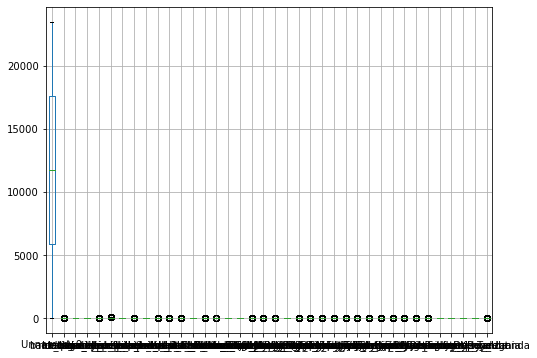

In [38]:
# checking for outliers 
df1.boxplot(figsize=(8, 6), fontsize=10)

# print size of the data with outliers present
print(df1.shape)

print("********************************************")

# removing outliers
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
df = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

# print size of the data after removal of outliers
print(df.shape)



<AxesSubplot:>

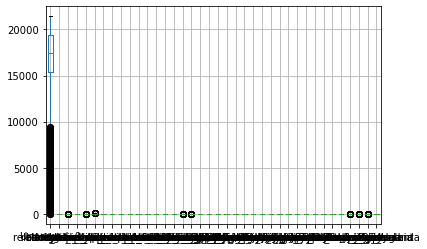

In [39]:
# plot of the new data, without ouliers
df.boxplot()

In [40]:
# checking for anomalies
# getting the quantiles
q1_house = df['household_size'].quantile(.25)
q3_house = df['household_size'].quantile(.75)

# calculating inter-quartile range using values from above
iqr_31_house = q3_house - q1_house

# another way is to find quantiles using the percentiles from the numpy library
q1_h, q3_h = np.percentile(df['household_size'], [25, 75]) 
# IQR
iqr_31_h = q3_h - q1_h

# compare if the two values are similar
print(iqr_31_house, iqr_31_h)


1.0 1.0


In [41]:
# getting to know more about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2379 entries, 6 to 21422
Data columns (total 38 columns):
 #   Column                                           Non-Null Count  Dtype
---  ------                                           --------------  -----
 0   Unnamed: 0                                       2379 non-null   int64
 1   bank_account                                     2379 non-null   int64
 2   location_type                                    2379 non-null   int64
 3   cellphone_access                                 2379 non-null   int64
 4   household_size                                   2379 non-null   int64
 5   age_of_respondent                                2379 non-null   int64
 6   gender_of_respondent                             2379 non-null   int64
 7   relationship_with_head_Child                     2379 non-null   int64
 8   relationship_with_head_Head of Household         2379 non-null   int64
 9   relationship_with_head_Other non-relatives       23

# Exploratory Data Analysis

## Univariate Analysis

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Frequency/count of individuals')

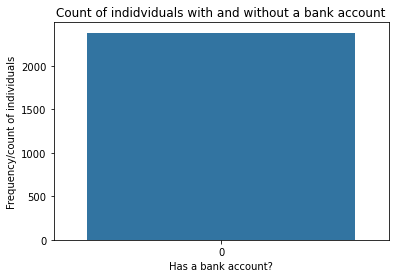

In [42]:
# how many individuals have or do not have bank accounts?
#
# plot a count plot for the variable
ax = sns.countplot(df['bank_account'], order = df['bank_account'].value_counts().index)
# formatting and labelling axes
plt.title('Count of indidviduals with and without a bank account')
plt.xlabel('Has a bank account?')
plt.ylabel('Frequency/count of individuals')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    1849
0     530
Name: location_type, dtype: int64

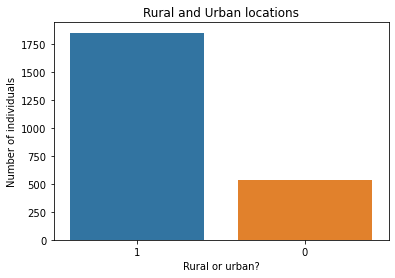

In [43]:
# plot count plot for the type of location
ax = sns.countplot(df['location_type'], order = df['location_type'].value_counts().index)
# formatting the plot, labelling axes
plt.title("Rural and Urban locations")
plt.xlabel('Rural or urban?')
plt.ylabel('Number of individuals')
# frequency table of the same for comparison
df['location_type'].value_counts()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of individuals')

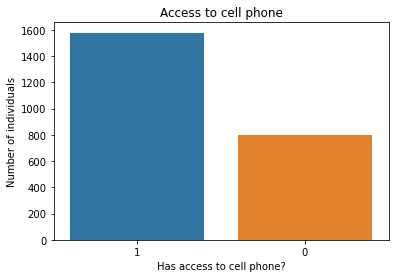

In [44]:
# plot count plot of the access to cell phones by individual respondent
ax = sns.countplot(df['cellphone_access'], order = df['cellphone_access'].value_counts().index)
# formatting and labelling the plot
plt.title('Access to cell phone')
plt.xlabel('Has access to cell phone?')
plt.ylabel('Number of individuals')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Frequency distribution across the population')

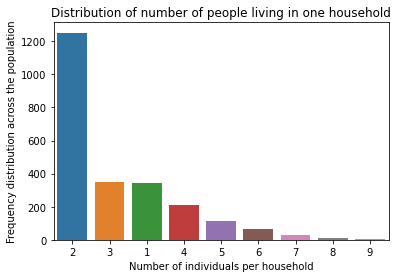

In [45]:
# plot for the number of people living in one household
ax = sns.countplot(df['household_size'], order = df['household_size'].value_counts().index)
# formatting and labelling chart
plt.title('Distribution of number of people living in one household')
plt.xlabel('Number of individuals per household')
plt.ylabel('Frequency distribution across the population')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Frequency/number of occurrences')

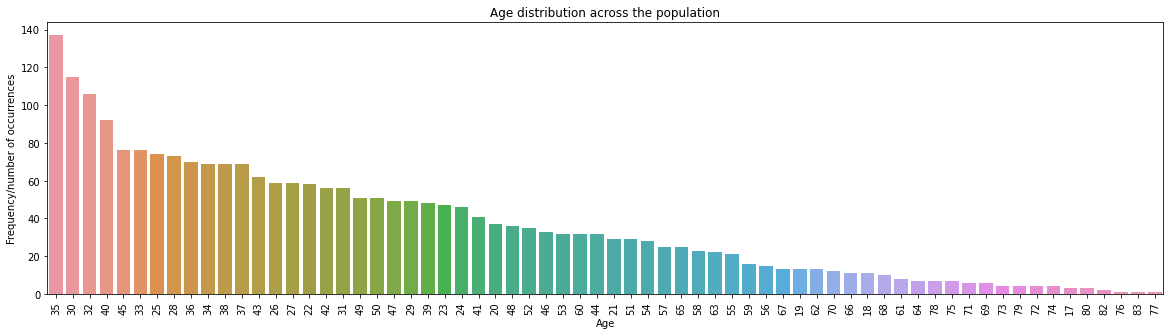

In [46]:
# plot age distribution of the respondents
# specify size of the figure since the values are so many-makes it easier to read the chart
plt.figure(figsize=(20,5))

ax = sns.countplot(df['age_of_respondent'], order = df['age_of_respondent'].value_counts().index)
# formatting and labelling the chart
plt.xticks(rotation = 90)
plt.title("Age distribution across the population")
plt.xlabel("Age")
plt.ylabel("Frequency/number of occurrences")


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Frequency')

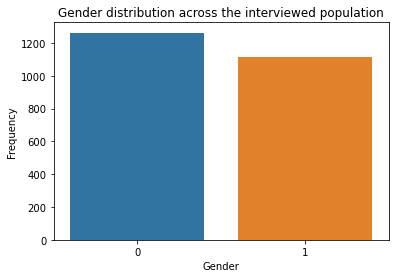

In [47]:
# count plot for the gender of the respondent
ax = sns.countplot(df['gender_of_respondent'], order = df['gender_of_respondent'].value_counts().index)
# formatting and labelling the plot
plt.title("Gender distribution across the interviewed population")
plt.xlabel("Gender")
plt.ylabel("Frequency")

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '0')])

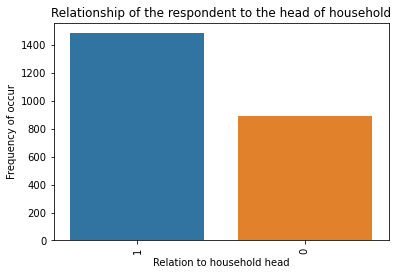

In [48]:
# count plot of the relationship of the respondent to the head of the household
ax = sns.countplot(df['relationship_with_head_Head of Household'], order = df['relationship_with_head_Head of Household'].value_counts().index)
# formatting and labelling the chart
plt.title("Relationship of the respondent to the head of household")
plt.xlabel("Relation to household head")
plt.ylabel("Frequency of occur")
plt.xticks(rotation = 90)

In [50]:
# plot of the marital status of the respondents, order them in descending order
ax = sns.countplot(df['marital_status_Divorced/Seperated'], order = df['marital_status_Divorced/Seperated'].value_counts().index)
# formatting the chart and labelling axes
plt.title("Marital status of the interviewees")
plt.xlabel("Marital status")
plt.ylabel("Number of individuals in the population")
plt.xticks(rotation=90)

KeyError: 'marital_status_Divorced'

Text(0, 0.5, 'Number of respondents')

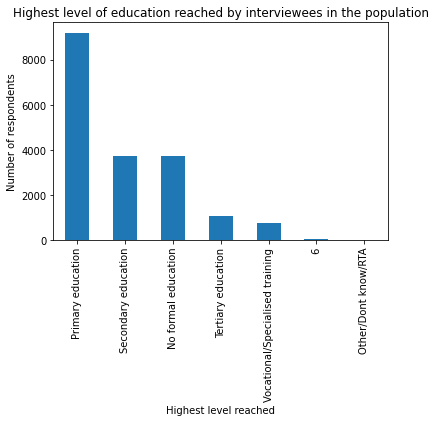

In [ ]:
# plot of the level of education for the respondents who took part in the interview
df['level_of_education'].value_counts().plot(kind='bar')
# formatting and labelling the plot
plt.title("Highest level of education reached by interviewees in the population")
plt.xlabel("Highest level reached")
plt.ylabel("Number of respondents")


In [ ]:
# notice an anomaly in the above plot.6 is represented yet it does not represent any thing related to level of education
# drop the anomaly 6 in the level of education
df = df[~(df['level_of_education']=='6')]
df['level_of_education'].value_counts()


Primary education                  9196
Secondary education                3712
No formal education                3703
Tertiary education                 1065
Vocational/Specialised training     761
Other/Dont know/RTA                   6
Name: level_of_education, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

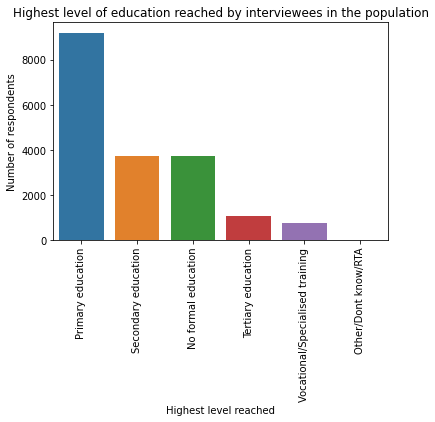

In [ ]:
# plot a new chart for the level of education after dropping the anomalies
ax = sns.countplot(df['level_of_education'], order = df['level_of_education'].value_counts().index)
# formatting and labelling the chart
plt.title("Highest level of education reached by interviewees in the population")
plt.xlabel("Highest level reached")
plt.ylabel("Number of respondents")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

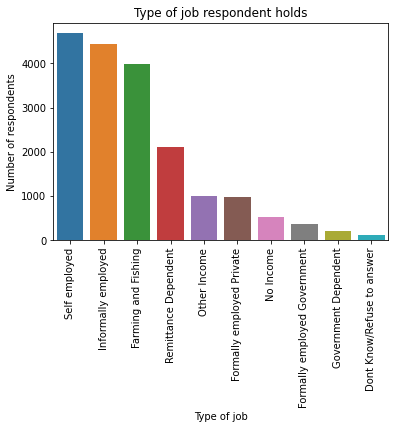

In [ ]:
# count plot for the type of job
ax = sns.countplot(df['type_of_job'], order = df['type_of_job'].value_counts().index)
# formatting and labelling the chart 
plt.title("Type of job respondent holds")
plt.xlabel("Type of job")
plt.ylabel("Number of respondents")
plt.xticks(rotation=90)

**Measures of central tendency**

In [ ]:
print(df['respondent_age'].mean())

print(df['respondent_age'].median())

print(df['respondent_age'].mode())

39.2298433009814
36.0
0    30.0
dtype: float64


In [ ]:
print(df['household_size'].mean())
print(df['household_size'].median())
print(df['household_size'].mode())

3.614162554898878
3.0
0    2.0
dtype: float64


## Bivariate Analysis

In [ ]:
# rename/save the dataframe using a new name 
finance = df
finance.head()

,country,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_education,type_of_job
0,Kenya,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
# checking the datatypes
finance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18443 entries, 0 to 23522
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 18443 non-null  object 
 1   has_a_bank_account      18443 non-null  object 
 2   type_of_location        18443 non-null  object 
 3   cell_phone_access       18443 non-null  object 
 4   household_size          18443 non-null  float64
 5   respondent_age          18443 non-null  float64
 6   gender_of_respondent    18443 non-null  object 
 7   relationship_with_head  18443 non-null  object 
 8   marital_status          18443 non-null  object 
 9   level_of_education      18443 non-null  object 
 10  type_of_job             18443 non-null  object 
dtypes: float64(2), object(9)
memory usage: 2.3+ MB


**Analysis by Country**

has_a_bank_account    No   Yes
country                       
Kenya               4029  1430
Rwanda              5567   931
Tanzania            4143   548
Uganda              1631   164


Text(0, 0.5, 'Distribution across the population')

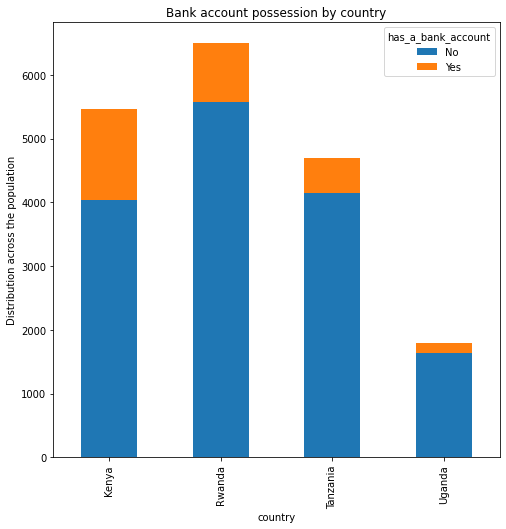

In [ ]:
# create a crosstab/frequency table for the countries and bank account possession
countries_bankacc= pd.crosstab(index=finance['country'], columns=finance['has_a_bank_account'])

print(countries_bankacc)
# plot chart for the frequencies represented in the crosstab dataframe 
countries_bankacc.plot(kind="bar", figsize=(8,8),stacked=True)
# labelling axes and formatting chart
plt.title("Bank account possession by country")
plt.ylabel("Distribution across the population")

cell_phone_access    No   Yes
country                      
Kenya              1091  4368
Rwanda             1264  5234
Tanzania           1847  2844
Uganda              540  1255


Text(0, 0.5, 'Distribution across the population')

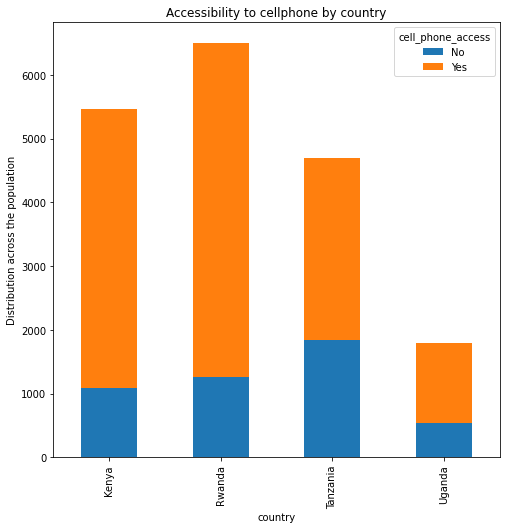

In [ ]:
# create a crosstab/frequency table for the countries and accessibility to cell phone
countries_cellphone = pd.crosstab(index=finance['country'], columns=finance['cell_phone_access'])

print(countries_cellphone)
# plot chart for the frequencies represented in the crosstab dataframe
countries_cellphone.plot(kind="bar", figsize=(8,8),stacked=True)
# labelling axes and formatting chart
plt.title("Accessibility to cellphone by country")
plt.ylabel("Distribution across the population")

type_of_location  Rural  Urban
country                       
Kenya              3131   2328
Rwanda             5336   1162
Tanzania           1559   3132
Uganda             1253    542


Text(0, 0.5, 'Distribution across the population')

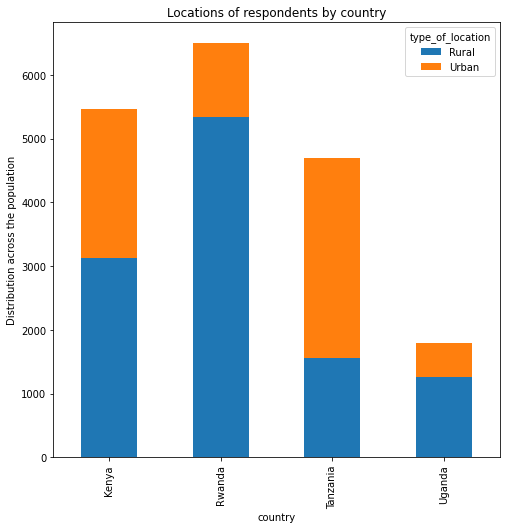

In [ ]:
# create a crosstab/frequency table 
countries_location = pd.crosstab(index=finance['country'], columns=finance['type_of_location'])
print(countries_location)

# plot chart for the frequencies represented in the crosstab dataframe 
countries_location.plot(kind="bar", figsize=(8,8),stacked=True)
# labelling axes and formatting chart
plt.title("Locations of respondents by country")
plt.ylabel("Distribution across the population")

household_size  0.0   1.0   2.0   3.0   4.0   5.0  6.0  7.0  8.0  9.0
country                                                              
Kenya             0   916   807   872   880   732  554  363  210  125
Rwanda            0   423   754  1158  1159  1106  845  612  301  140
Tanzania         30  1870  1812   560   243   101   43   21    9    2
Uganda            0   168   238   311   259   240  212  171  125   71


Text(0, 0.5, 'Distribution across the population')

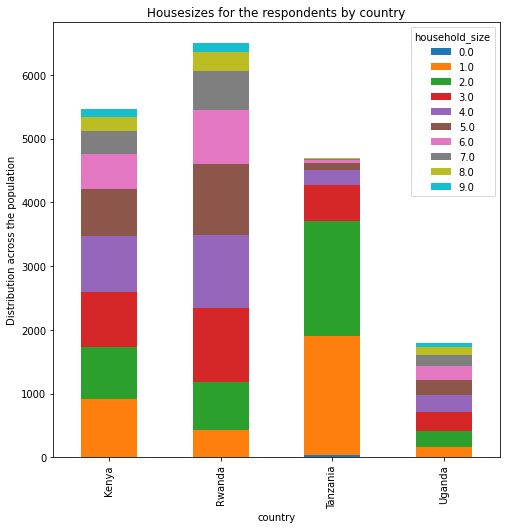

In [ ]:
# create a frequency table dataframe
countries_housesize = pd.crosstab(index=finance['country'], columns=finance['household_size'])
print(countries_housesize)
# plot chart from the frequency table dataframe
countries_housesize.plot(kind="bar", figsize=(8,8),stacked=True)
# labelling axes and formatting chart
plt.title("Housesizes for the respondents by country")
plt.ylabel("Distribution across the population")

marital_status  Divorced/Seperated  Dont know  ...  Single/Never Married  Widowed
country                                        ...                               
Kenya                          339          8  ...                  1320      619
Rwanda                         444          0  ...                  1569      971
Tanzania                       974          0  ...                  2638      513
Uganda                         155          0  ...                   335      168

[4 rows x 5 columns]


Text(0, 0.5, 'Distribution across the population')

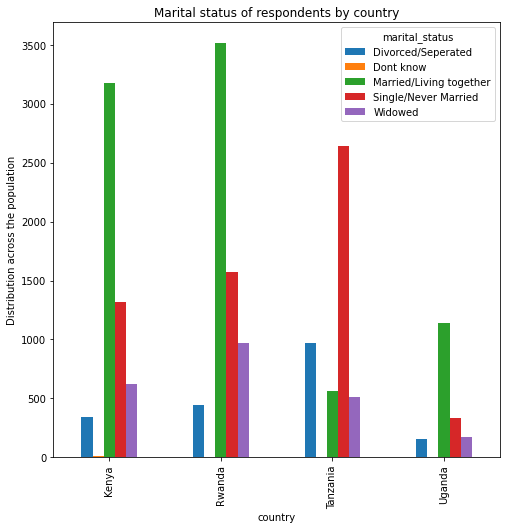

In [ ]:
# create a crosstab dataframe
countries_gender = pd.crosstab(index=finance['country'], columns=finance['marital_status'])
print(countries_gender)
# plot chart from the dataframe
countries_gender.plot(kind="bar", figsize=(8,8))
# formatting and labelling chart
plt.title("Marital status of respondents by country")
plt.ylabel("Distribution across the population")

type_of_job  Dont Know/Refuse to answer  ...  Self employed
country                                  ...               
Kenya                                 3  ...            904
Rwanda                               54  ...            553
Tanzania                              0  ...           2318
Uganda                               62  ...            902

[4 rows x 10 columns]


Text(0, 0.5, 'Distribution across the population')

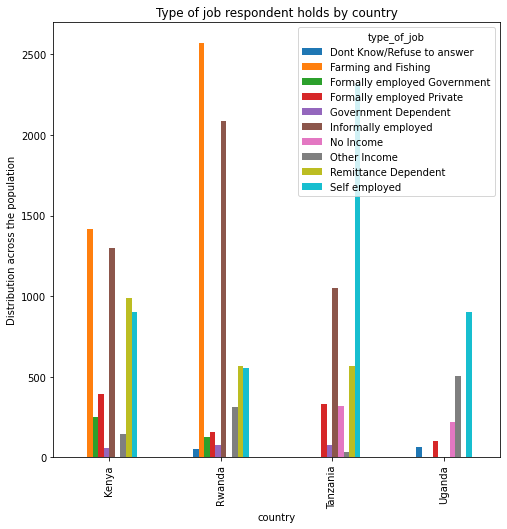

In [ ]:
# create crosstab dataframe
countries_job = pd.crosstab(index=finance['country'], columns=finance['type_of_job'])
print(countries_job)
# plot chart
countries_job.plot(kind="bar", figsize=(8,8))
# formatting
plt.title("Type of job respondent holds by country")
plt.ylabel("Distribution across the population")

**Demographic factor analysis**

has_a_bank_account                 No   Yes
level_of_education                         
No formal education              3541   162
Other/Dont know/RTA                 0     6
Primary education                8185  1011
Secondary education              2803   909
Tertiary education                512   553
Vocational/Specialised training   329   432


Text(0, 0.5, 'Distribution across the population')

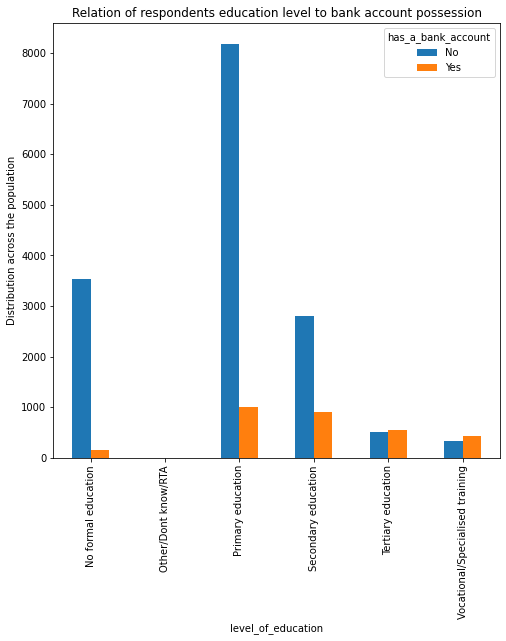

In [ ]:
# create crosstab
edu_bank = pd.crosstab(index=finance['level_of_education'], columns=finance['has_a_bank_account'])
print(edu_bank)
# plot chart
edu_bank.plot(kind="bar", figsize=(8,8))
# format & label chart
plt.title("Relation of respondents education level to bank account possession")
plt.ylabel("Distribution across the population")

has_a_bank_account   No  Yes
respondent_age              
16.0                357    5
17.0                364    8
18.0                453   20
19.0                362   27
20.0                470   35
...                 ...  ...
82.0                 31    5
83.0                 28    2
84.0                 18    2
85.0                 49    2
86.0                 20    3

[71 rows x 2 columns]


Text(0, 0.5, 'Distribution across the population')

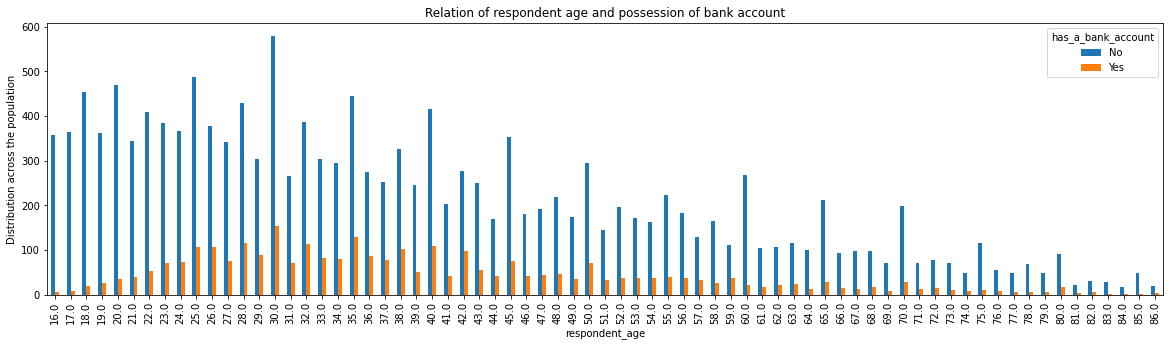

In [ ]:
# create crosstab dataframe
age_bank = pd.crosstab(index=finance['respondent_age'], columns=finance['has_a_bank_account'])
print(age_bank)
# plot chart
age_bank.plot(kind="bar", figsize=(20,5))
# format and label chart
plt.title("Relation of respondent age and possession of bank account")
plt.ylabel("Distribution across the population")

has_a_bank_account      No   Yes
gender_of_respondent            
Female                9572  1402
Male                  5798  1671


Text(0, 0.5, 'Distribution across the population')

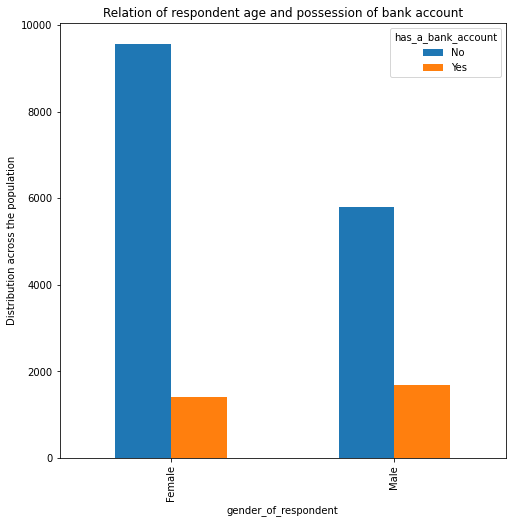

In [ ]:
# create crosstab dataframe
gender_bank = pd.crosstab(index=finance['gender_of_respondent'], columns=finance['has_a_bank_account'])
print(gender_bank)
# plot of the relation of gender to individuals possession to bank account
gender_bank.plot(kind="bar", figsize=(8,8))
# formatting&labelling chart
plt.title("Relation of respondent age and possession of bank account")
plt.ylabel("Distribution across the population")

has_a_bank_account         No   Yes
marital_status                     
Divorced/Seperated       1689   223
Dont know                   6     2
Married/Living together  6653  1737
Single/Never Married     4980   882
Widowed                  2042   229


Text(0, 0.5, 'Distribution across the population')

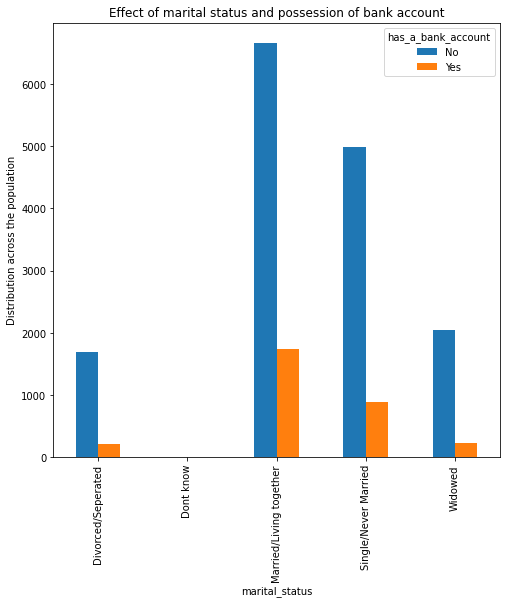

In [ ]:
# create crosstab dataframe
marital_bank = pd.crosstab(index=finance['marital_status'], columns=finance['has_a_bank_account'])
print(marital_bank)
# plot chart
marital_bank.plot(kind="bar", figsize=(8,8))
# formatting&labelling
plt.title("Effect of marital status and possession of bank account")
plt.ylabel("Distribution across the population")

has_a_bank_account              No  Yes
type_of_job                            
Dont Know/Refuse to answer     105   14
Farming and Fishing           3406  583
Formally employed Government    85  288
Formally employed Private      460  523
Government Dependent           171   42
Informally employed           4017  418
No Income                      523   13
Other Income                   816  182
Remittance Dependent          1903  217
Self employed                 3884  793


Text(0, 0.5, 'Distribution across the population')

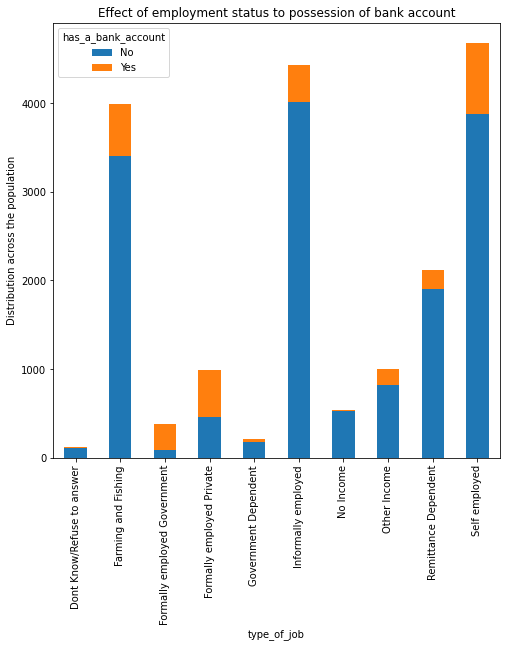

In [ ]:
# create crosstab dataframe
employ_bank = pd.crosstab(index=finance['type_of_job'], columns=finance['has_a_bank_account'])
print(employ_bank)
# plot chart from the dataframe
employ_bank.plot(kind="bar", figsize=(8,8), stacked=True)
# labelling chart
plt.title("Effect of employment status to possession of bank account")
plt.ylabel("Distribution across the population")

has_a_bank_account    No   Yes
type_of_location              
Rural               9739  1540
Urban               5631  1533


Text(0, 0.5, 'Distribution across the population')

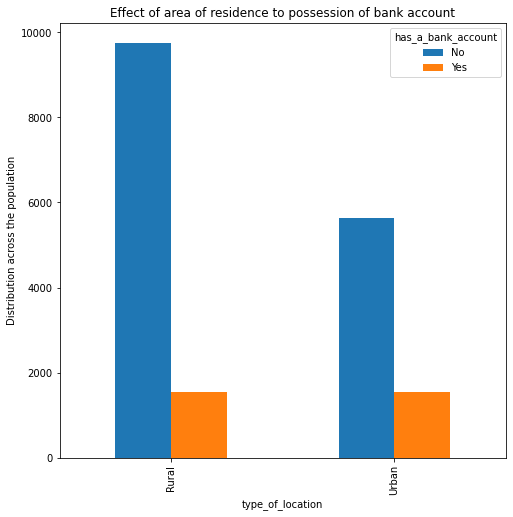

In [ ]:
# create crosstab dataframe
location_bank = pd.crosstab(index=finance['type_of_location'], columns=finance['has_a_bank_account'])
print(location_bank)
# plot chart
location_bank.plot(kind="bar", figsize=(8,8))
# label chart
plt.title("Effect of area of residence to possession of bank account")
plt.ylabel("Distribution across the population")

has_a_bank_account    No  Yes
household_size               
0.0                   29    1
1.0                 2750  627
2.0                 3022  589
3.0                 2427  474
4.0                 2091  450
5.0                 1786  393
6.0                 1403  251
7.0                  998  169
8.0                  562   83
9.0                  302   36


Text(0, 0.5, 'Distribution across the population')

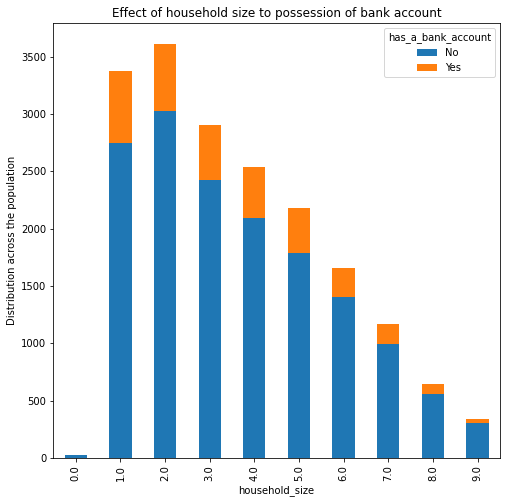

In [ ]:
# create crosstab dataframe
housesize_bank = pd.crosstab(index=finance['household_size'], columns=finance['has_a_bank_account'])
print(housesize_bank)
# plot chart
housesize_bank.plot(kind="bar", figsize=(8,8), stacked=True)
# label chart
plt.title("Effect of household size to possession of bank account")
plt.ylabel("Distribution across the population")

has_a_bank_account     No   Yes
cell_phone_access              
No                   4647    95
Yes                 10723  2978


Text(0, 0.5, 'Distribution across the population')

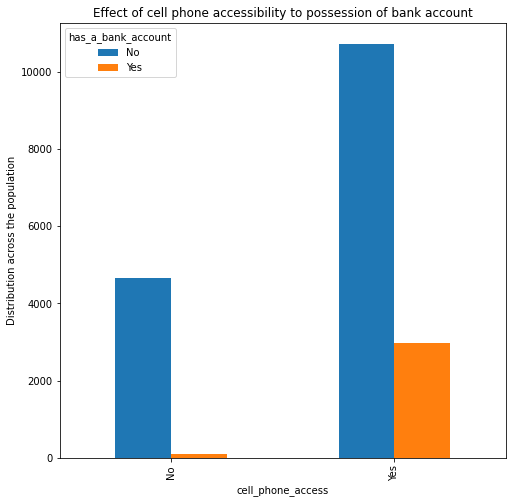

In [ ]:
# create crosstab dataframe
cellphone_bank = pd.crosstab(index=finance['cell_phone_access'], columns=finance['has_a_bank_account'])
print(cellphone_bank)
# plot chart
cellphone_bank.plot(kind="bar", figsize=(8,8))
# labelling chart
plt.title("Effect of cell phone accessibility to possession of bank account")
plt.ylabel("Distribution across the population")

has_a_bank_account        No   Yes
relationship_with_head            
Child                   1636   184
Head of Household       8195  2095
Other non-relatives      158    19
Other relative           566    64
Parent                   890    58
Spouse                  3925   653


Text(0, 0.5, 'Distribution across the population')

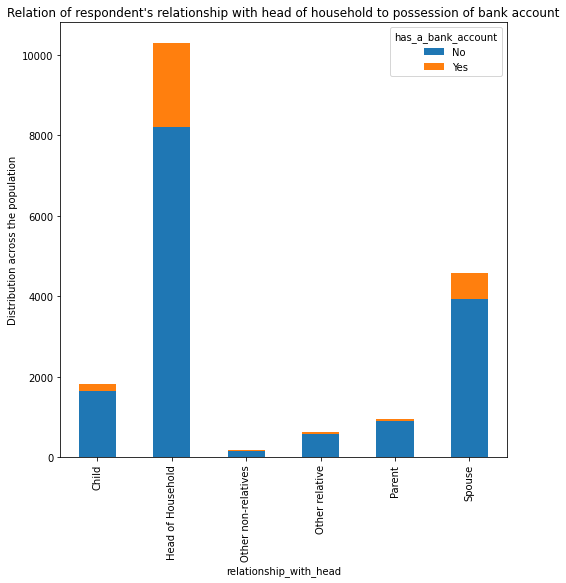

In [ ]:
# create crosstab dataframe
relation_withhead_bank = pd.crosstab(index=finance['relationship_with_head'], columns=finance['has_a_bank_account'])
print(relation_withhead_bank)
# plot chart
relation_withhead_bank.plot(kind="bar", figsize=(8,8), stacked=True)
# label chart
plt.title("Relation of respondent's relationship with head of household to possession of bank account")
plt.ylabel("Distribution across the population")

## Multivariate Analysis

# Findings

After univariate analysis, it was found that :
- a huge population of the respondents in the four countries did not have or use a bank account.
- most individuals live in rural areas
- the most popular family/household size is 2
- a huge number of the respondents are of age 30, while the mean of the ages of all respondents was 39.
- a large population of the respondents were female.
- huge number of the respondents were heads of the household, followed by spouses.
- most individuals in the population were married and the next most highest were single individuals.
- most respondents had only studied upto primary level of education. Very few had studied upto the tertiary level. 
- a huge number of the respondent population were self-employed



After bivariate analysis by country, it was found that: 
- Rwanda recorded a huge number of individuals without a bank account. Kenya however, recorded a relatively high number of individuals possessing a bank account. 
- the distribution of accessibility to cell phone was fairly distributed across the countries with Tanzania having a relatively huge population with no access to a cell phone
- most respondents from Tanzania reside in urban areas, while in Rwanda a huge population live in rural areas
- in Tanzania, most respondents live in household sizes of 1 or 2 people
- most respondents in Kenya, Rwanda and Uganda are married while in Uganda, a huge population are single/never married
- a huge population of the respondents from Kenya and Rwanda do farming and fishing as their income source, while in Uganda and Tanzania,a huge population are self-employed



After bivariate analysis by demographic factors, it was found that:
- most individuals who had gone through higher education i.e. tertiary level or vocational training, have/use a bank account, hence the bars are almost equal
- a huge population of individuals of ages 30, 35, 40, 42 had bank accounts
- as much as females dominated the respondents population, males who have/use a bank account were relatively more than the females who use a bank account
- most respondents who are married have a bank account followed by those who are single
- more individuals that are self employed have a bank account, followed by farmers, formally employed privately and informally employed
- area of residence did not have a huge effect on bank account possession as more individuals living in the rural areas had a bank account compared to those in urban areas
- individuals who live in households with a smaller size tend to own a bank account
- more individuals that have access to a cell phone have a bank account. This could be due to the accessiblity of mobile banking, online banking services which can be done on the phone.
- more individuals that are head of household have a a bank account followed by spouses. This could be due to the responsibilities that generally fall onto the head of the household that leads them to budgeting, saving for the future and hence having a bank account to manage finances.